Degree 1
MAE: 62.85118549084989
MSE: 6413.126128992175
RMSE: 80.08199628500887
R^2: 0.40600391479679754
Adjusted R^2: 0.3987600600991975
Degree 2
MAE: 60.107437930120355
MSE: 6159.03559397215
RMSE: 78.47952340561295
R^2: 0.42953826919016735
Adjusted R^2: 0.4225814188144378
Degree 3
MAE: 59.333932994600865
MSE: 6096.963546731627
RMSE: 78.08305543926689
R^2: 0.4352875016736417
Adjusted R^2: 0.4284007638891739
Degree 4
MAE: 59.44769224440876
MSE: 6094.722118867659
RMSE: 78.0687012756563
R^2: 0.4354951070364058
Adjusted R^2: 0.4286109010246546
Degree 5
MAE: 59.53685229402479
MSE: 6077.427696954457
RMSE: 77.95785846824204
R^2: 0.4370969496800198
Adjusted R^2: 0.43023227833465416
Degree 6
MAE: 59.485989211437605
MSE: 6071.65841733824
RMSE: 77.92084712923904
R^2: 0.4376313114620193
Adjusted R^2: 0.43077315672375116


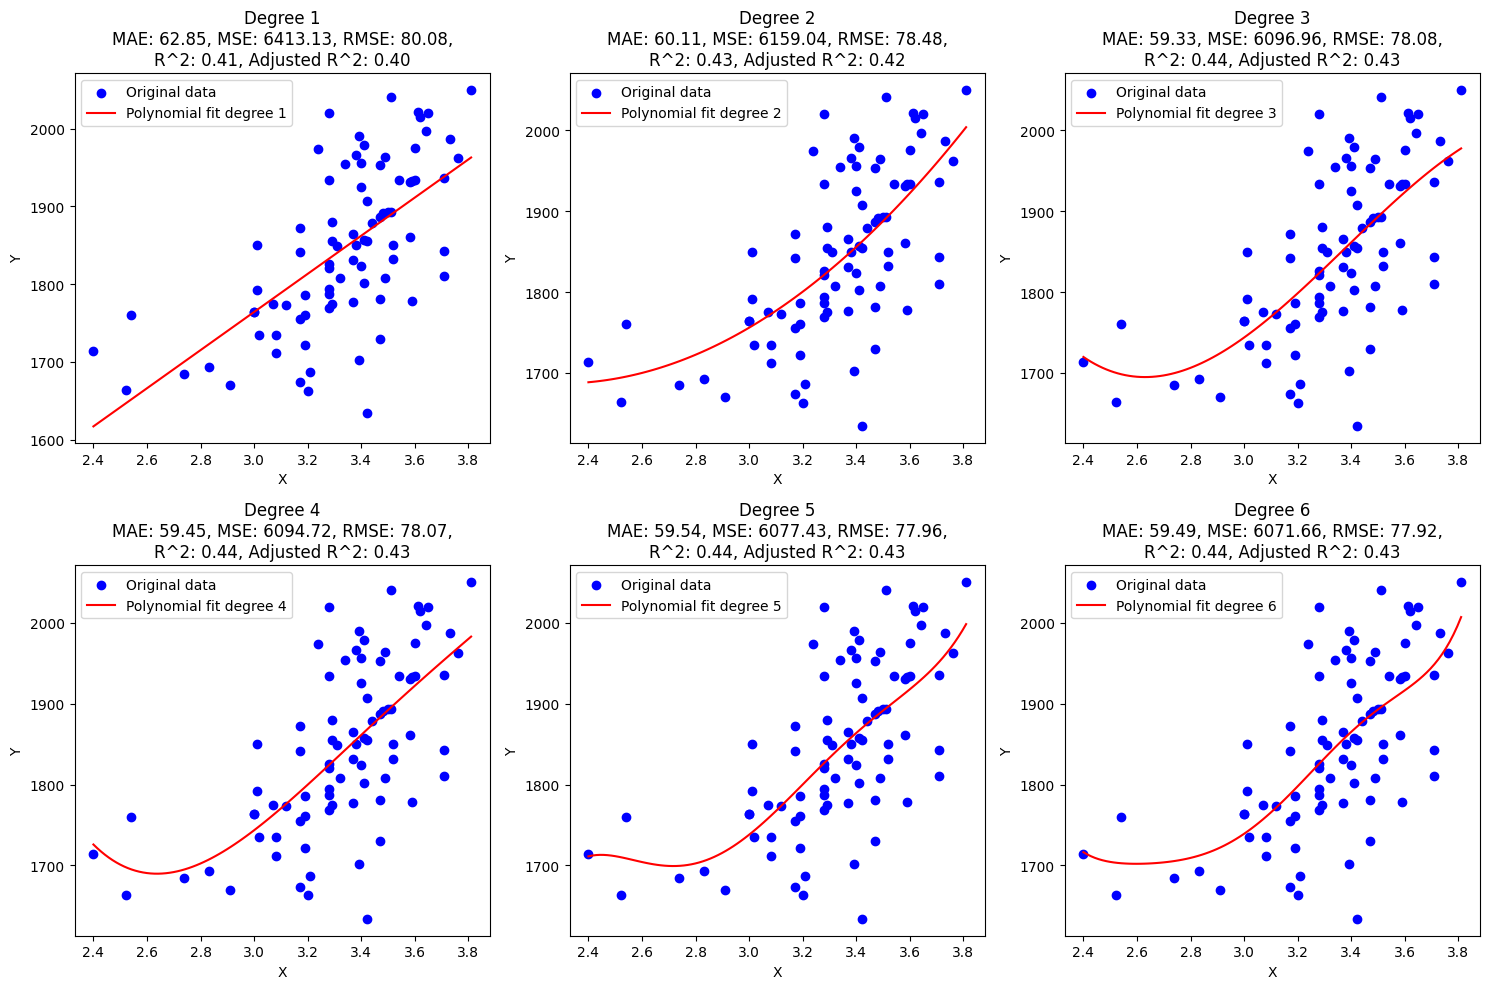

0

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Sample data
y = np.array([1714,1664,1760,1685,1693,1670,1764,1764,1792,1850,1735,1775,1735,1712,1773,1872,1755,1674,1842,1786,1761,1722,1663,1687,1974,1826,1787,1821,2020,1794,1769,1934,1775,1855,1880,1849,1808,1954,1777,1831,1865,1850,1966,1702,1990,1925,1824,1956,1857,1979,1802,1855,1907,1634,1879,1887,1730,1953,1781,1891,1964,1808,1893,2041,1893,1832,1850,1934,1861,1931,1933,1778,1975,1934,2021,2015,1997,2020,1843,1936,1810,1987,1962,2050])
x = np.array([2.4,2.52,2.54,2.74,2.83,2.91,3,3,3.01,3.01,3.02,3.07,3.08,3.08,3.12,3.17,3.17,3.17,3.17,3.19,3.19,3.19,3.2,3.21,3.24,3.28,3.28,3.28,3.28,3.28,3.28,3.28,3.29,3.29,3.29,3.31,3.32,3.34,3.37,3.37,3.37,3.38,3.38,3.39,3.39,3.4,3.4,3.4,3.41,3.41,3.41,3.42,3.42,3.42,3.44,3.47,3.47,3.47,3.47,3.48,3.49,3.49,3.5,3.51,3.51,3.52,3.52,3.54,3.58,3.58,3.59,3.59,3.6,3.6,3.61,3.62,3.64,3.65,3.71,3.71,3.71,3.73,3.76,3.81])
x = x[:, np.newaxis]

# Generate x values for fitting
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

# Prepare visualization with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the array of axes for easier access

# Number of observations and number of predictors (for adjusted R^2)
n = len(y)
p = 1  # Assume one predictor. Adjust according to the actual case.

for degree, ax in zip(range(1, 7), axes):
    # Create and train the model
    poly_model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    poly_model.fit(x, y)

    # Predict values using the trained model ON THE ORIGINAL x SET
    y_pred = poly_model.predict(x)

    # Metrics
    mae = np.mean(np.abs(y - y_pred))
    mse = mean_squared_error(y, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y, y_pred)
    adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)

    # Plot using fig and ax objects
    ax.scatter(x, y, color="blue", label="Original data")
    ax.plot(x_range, poly_model.predict(x_range), color="red", label=f"Polynomial fit degree {degree}")  # For the fitting line, we still use x_range
    ax.set_title(f"Degree {degree}\nMAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f},\nR^2: {r2:.2f}, Adjusted R^2: {adjusted_r2:.2f}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()

    # Print the metrics
    print(f"Degree {degree}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print(f"Adjusted R^2: {adjusted_r2}")

# Adjust the layout to avoid overlaps
plt.tight_layout()
plt.show()
0

Degree 6

MAE: 59.485989211437605

MSE: 6071.65841733824

RMSE: 77.92084712923904

R^2: 0.4376313114620193

Adjusted R^2: 0.43077315672375116

## Results

**Original**
Original - MSE: 6413.126128992174, R^2: 0.40600391479679765

**Logarithmic transformation**
Logarithmic - MSE: 0.0018791870047962045, R^2: 0.4091129907268003

**6th-degree polynomial model**
6th-degree - MSE: 6071.65841733824, R^2: 0.4376313114620193

---

## Conclusions

To discern which among all transformations and polynomial fittings provides the best result, I carefully evaluated key metrics: the Mean Squared Error (MSE) and the Coefficient of Determination (R^2). These metrics offer a clear view of the model's prediction accuracy and fit.

Firstly, MSE measures how much the predictions deviate from actual values; the lower, the better. Conversely, R^2 assesses how well independent variables predict the dependent variable. A higher R^2 suggests a more fitting model.

Looking at the results, the **logarithmic transformation** stands out for having the lowest MSE, indicating that, on average, the predictions are quite precise. However, the improvement in R^2 is minimal.

In contrast, the **6th-degree polynomial model**, though not having the lowest MSE, shows a notable improvement in R^2, suggesting a better overall fit. This balance between MSE and R^2 makes it an appealing option, especially if one aims to explain more variability in the data without sacrificing too much in terms of precision.

Thus, depending on what you value more (minimizing prediction error or enhancing the explanation of variability), the logarithmic transformation or the 6th-degree polynomial model would be my recommendations. My final choice will be based on the specific analysis goals and how I plan to apply these models in practice.






